In [1]:
import pandas as pd

twitter = pd.read_csv('twitter_cleaned_stemmed-2.csv', index_col=False)
reddit = pd.read_csv('reddit_cleaned_stemmed.csv', index_col=False)

In [2]:
reddit.drop({'Unnamed: 0.1', 'Unnamed: 0'}, axis=1, inplace=True)

In [3]:
twitter.drop({'Unnamed: 0'}, axis=1, inplace=True)

In [4]:
twitter.rename(columns={'Tweet': 'text', 'Suicide': 'class'}, inplace=True)

In [5]:
reddit.dropna(how='any', inplace=True)
twitter.dropna(how='any', inplace=True)

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
reddit['class'] = le.fit_transform(reddit['class'])

In [7]:
X_twitter = twitter['text']
y_twitter = twitter['class']

X_reddit = reddit['text']
y_reddit = reddit['class']

In [8]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_twitter)
tokenizer.fit_on_texts(X_reddit)
X_twitter = tokenizer.texts_to_sequences(X_twitter)
X_reddit = tokenizer.texts_to_sequences(X_reddit)
X_twitter = sequence.pad_sequences(X_twitter, padding='post', maxlen=300)
X_reddit = sequence.pad_sequences(X_reddit, padding='post', maxlen=300)

In [9]:
from sklearn.model_selection import train_test_split
X_trainreddit, X_testreddit, y_trainreddit, y_testreddit80 = train_test_split(X_reddit, y_reddit, test_size=0.2, random_state=42)
X_traintwitter, X_testtwitter, y_traintwitter, y_testtwitter = train_test_split(X_twitter, y_twitter, test_size=0.2, random_state=42)

In [10]:
from imblearn.combine import SMOTEENN
sampler = SMOTEENN(sampling_strategy = 'all',random_state = 123, n_jobs = -1)
X_traintwitter, y_traintwitter = sampler.fit_resample(X_traintwitter, y_traintwitter)

/Users/juinnshengna/Desktop/wqd7005 assignment/.venv/lib/python3.10/site-packages/imblearn/over_sampling/_smote/base.py:363: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [15]:
from keras.layers import Embedding, Bidirectional, GRU, LSTM, Dropout, Dense
from tensorflow.keras.models import Sequential
max_words = 10000
max_len = 300
model_biGRU = Sequential()
model_biGRU.add(Embedding(input_dim=max_words, output_dim=100, input_length=max_len))
model_biGRU.add(Bidirectional(GRU(16, return_sequences=True)))
model_biGRU.add(Bidirectional(LSTM(8, return_sequences=True)))
model_biGRU.add(Bidirectional(GRU(4, return_sequences=True)))
model_biGRU.add(Bidirectional(GRU(2)))
model_biGRU.add(Dropout(0.2))
model_biGRU.add(Dense(1, activation='sigmoid'))

model_biGRU.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_biGRU.summary()

/Users/juinnshengna/Desktop/wqd7005 assignment/.venv/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:86: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_4 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_5 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_6 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_7 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [17]:
historyreddit80twitter20bigru = model_biGRU.fit(X_trainreddit, y_trainreddit, batch_size=64, epochs=10, validation_data=(X_testtwitter, y_testtwitter))

Epoch 1/10
2900/2900 ━━━━━━━━━━━━━━━━━━━━ 857s 295ms/step - accuracy: 0.8920 - loss: 0.3037 - val_accuracy: 0.7806 - val_loss: 0.4219
Epoch 2/10
2900/2900 ━━━━━━━━━━━━━━━━━━━━ 866s 299ms/step - accuracy: 0.9341 - loss: 0.1879 - val_accuracy: 0.7948 - val_loss: 0.4577
Epoch 3/10
2900/2900 ━━━━━━━━━━━━━━━━━━━━ 850s 293ms/step - accuracy: 0.9456 - loss: 0.1541 - val_accuracy: 0.8027 - val_loss: 0.4575
Epoch 4/10
2900/2900 ━━━━━━━━━━━━━━━━━━━━ 857s 295ms/step - accuracy: 0.9537 - loss: 0.1304 - val_accuracy: 0.7948 - val_loss: 0.4949
Epoch 5/10
2900/2900 ━━━━━━━━━━━━━━━━━━━━ 850s 293ms/step - accuracy: 0.9598 - loss: 0.1131 - val_accuracy: 0.8086 - val_loss: 0.5353
Epoch 6/10
2900/2900 ━━━━━━━━━━━━━━━━━━━━ 849s 293ms/step - accuracy: 0.9656 - loss: 0.0954 - val_accuracy: 0.8201 - val_loss: 0.5365
Epoch 7/10
2900/2900 ━━━━━━━━━━━━━━━━━━━━ 851s 294ms/step - accuracy: 0.9692 - loss: 0.0850 - val_accuracy: 0.8091 - val_loss: 0.5849
Epoch 8/10
2900/2900 ━━━━━━━━━━━━━━━━━━━━ 851s 293ms/step - ac

In [18]:
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
y_predr80t20bigru = model_biGRU.predict(X_testtwitter)
y_pred_binaryr80t20bigru= np.round(y_predr80t20bigru)

precisionr80t20bigru = precision_score(y_testtwitter, y_pred_binaryr80t20bigru)
recallr80t20bigru = recall_score(y_testtwitter, y_pred_binaryr80t20bigru)
f1r80t20bigru = f1_score(y_testtwitter, y_pred_binaryr80t20bigru)
accuracyr80t20bigru= accuracy_score(y_testtwitter, y_pred_binaryr80t20bigru)
print("Precision:", precisionr80t20bigru)
print("Recall:", recallr80t20bigru)
print("F1 Score:", f1r80t20bigru)
print("Accuracy:", accuracyr80t20bigru)

68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step
Precision: 0.7362020579981291
Recall: 0.8390191897654584
F1 Score: 0.7842551071250623
Accuracy: 0.8008279668813247


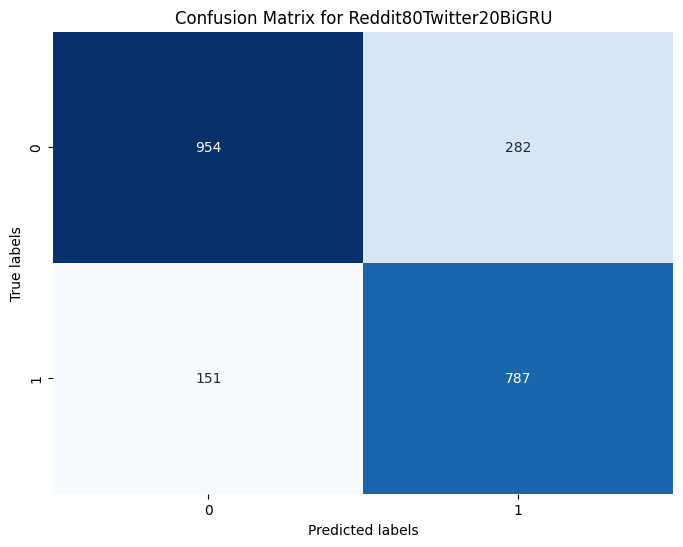

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
r80t20bigru = confusion_matrix(y_testtwitter, y_pred_binaryr80t20bigru)
plt.figure(figsize=(8, 6))
sns.heatmap(r80t20bigru, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix for Reddit80Twitter20BiGRU")
plt.show()

In [20]:
historyreddit80twitter20bigru = model_biGRU.fit(X_trainreddit, y_trainreddit, batch_size=64, epochs=10, validation_data=(X_testreddit, y_testreddit80))

Epoch 1/10
2900/2900 ━━━━━━━━━━━━━━━━━━━━ 881s 304ms/step - accuracy: 0.9824 - loss: 0.0480 - val_accuracy: 0.9288 - val_loss: 0.2912
Epoch 2/10
2900/2900 ━━━━━━━━━━━━━━━━━━━━ 880s 304ms/step - accuracy: 0.9849 - loss: 0.0419 - val_accuracy: 0.9289 - val_loss: 0.3338
Epoch 3/10
2900/2900 ━━━━━━━━━━━━━━━━━━━━ 886s 305ms/step - accuracy: 0.9865 - loss: 0.0374 - val_accuracy: 0.9255 - val_loss: 0.3452
Epoch 4/10
2900/2900 ━━━━━━━━━━━━━━━━━━━━ 883s 304ms/step - accuracy: 0.9879 - loss: 0.0329 - val_accuracy: 0.9263 - val_loss: 0.3646
Epoch 5/10
2900/2900 ━━━━━━━━━━━━━━━━━━━━ 885s 305ms/step - accuracy: 0.9897 - loss: 0.0295 - val_accuracy: 0.9252 - val_loss: 0.3832
Epoch 6/10
2900/2900 ━━━━━━━━━━━━━━━━━━━━ 883s 304ms/step - accuracy: 0.9903 - loss: 0.0265 - val_accuracy: 0.9257 - val_loss: 0.3915
Epoch 7/10
2900/2900 ━━━━━━━━━━━━━━━━━━━━ 884s 305ms/step - accuracy: 0.9901 - loss: 0.0265 - val_accuracy: 0.9221 - val_loss: 0.3873
Epoch 8/10
2900/2900 ━━━━━━━━━━━━━━━━━━━━ 893s 308ms/step - ac

In [21]:
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
y_predr80r20bigru = model_biGRU.predict(X_testreddit)
y_pred_binaryr80r20bigru= np.round(y_predr80r20bigru)

precisionr80r20bigru = precision_score(y_testreddit80, y_pred_binaryr80r20bigru)
recallr80r20bigru = recall_score(y_testreddit80, y_pred_binaryr80r20bigru)
f1r80r20bigru = f1_score(y_testreddit80, y_pred_binaryr80r20bigru)
accuracyr80r20bigru= accuracy_score(y_testreddit80, y_pred_binaryr80r20bigru)
print("Precision:", precisionr80r20bigru)
print("Recall:", recallr80r20bigru)
print("F1 Score:", f1r80r20bigru)
print("Accuracy:", accuracyr80r20bigru)

1450/1450 ━━━━━━━━━━━━━━━━━━━━ 77s 53ms/step
Precision: 0.9307652037344036
Recall: 0.918661729245608
F1 Score: 0.9246738612230746
Accuracy: 0.9250781334195495


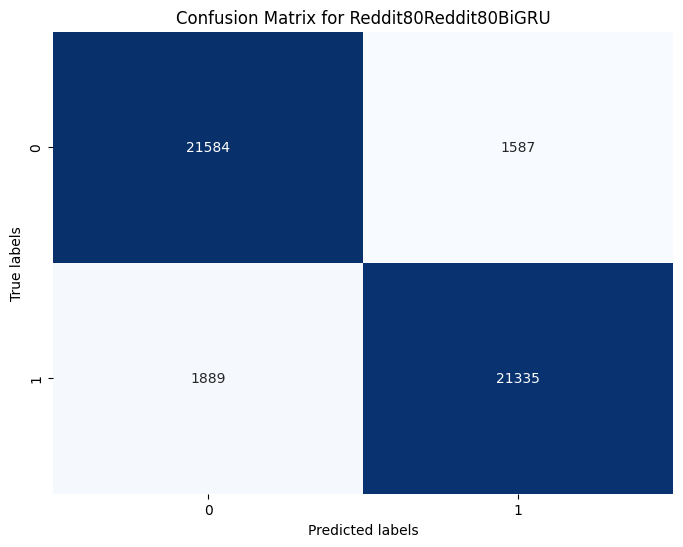

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
r80r20bigru = confusion_matrix(y_testreddit80, y_pred_binaryr80r20bigru)
plt.figure(figsize=(8, 6))
sns.heatmap(r80r20bigru, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix for Reddit80Reddit80BiGRU")
plt.show()

In [22]:
historytwitter80reddit20bigru = model_biGRU.fit(X_traintwitter, y_traintwitter, batch_size=64, epochs=10, validation_data=(X_testreddit, y_testreddit80))

Epoch 1/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 63s 753ms/step - accuracy: 0.8937 - loss: 0.5273 - val_accuracy: 0.8333 - val_loss: 0.5935
Epoch 2/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 64s 762ms/step - accuracy: 0.9626 - loss: 0.1316 - val_accuracy: 0.8477 - val_loss: 0.5701
Epoch 3/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 64s 768ms/step - accuracy: 0.9764 - loss: 0.0808 - val_accuracy: 0.8477 - val_loss: 0.6395
Epoch 4/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 65s 776ms/step - accuracy: 0.9835 - loss: 0.0630 - val_accuracy: 0.8361 - val_loss: 0.7383
Epoch 5/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 65s 782ms/step - accuracy: 0.9910 - loss: 0.0388 - val_accuracy: 0.8386 - val_loss: 0.8035
Epoch 6/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 65s 781ms/step - accuracy: 0.9937 - loss: 0.0304 - val_accuracy: 0.8464 - val_loss: 0.8083
Epoch 7/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 65s 780ms/step - accuracy: 0.9929 - loss: 0.0242 - val_accuracy: 0.8412 - val_loss: 0.8945
Epoch 8/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 63s 759ms/step - accuracy: 0.9941 - loss: 0.0199 - val_accu

In [23]:
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
y_predt80r20bigru = model_biGRU.predict(X_testreddit)
y_pred_binaryt80r20bigru= np.round(y_predt80r20bigru)

precisiont80r20bigru = precision_score(y_testreddit80, y_pred_binaryt80r20bigru)
recallt80r20bigru = recall_score(y_testreddit80, y_pred_binaryt80r20bigru)
f1t80r20bigru = f1_score(y_testreddit80, y_pred_binaryt80r20bigru)
accuracyt80r20bigru= accuracy_score(y_testreddit80, y_pred_binaryt80r20bigru)
print("Precision:", precisiont80r20bigru)
print("Recall:", recallt80r20bigru)
print("F1 Score:", f1t80r20bigru)
print("Accuracy:", accuracyt80r20bigru)

1450/1450 ━━━━━━━━━━━━━━━━━━━━ 77s 53ms/step
Precision: 0.7935873906941595
Recall: 0.9495780227351016
F1 Score: 0.8646031403759826
Accuracy: 0.8511261989438517


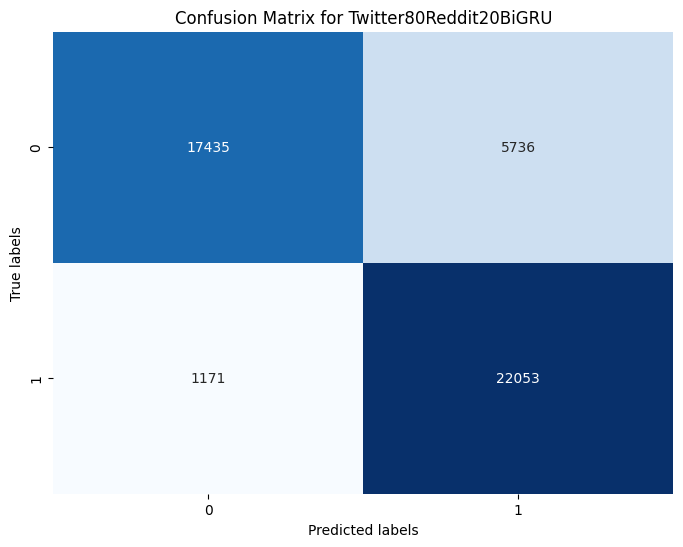

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
t80r20bigru = confusion_matrix(y_testreddit80, y_pred_binaryt80r20bigru)
plt.figure(figsize=(8, 6))
sns.heatmap(t80r20bigru, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix for Twitter80Reddit20BiGRU")
plt.show()

In [25]:
historytwitter80twitter80bigru = model_biGRU.fit(X_traintwitter, y_traintwitter, batch_size=64, epochs=10, validation_data=(X_testtwitter, y_testtwitter))

Epoch 1/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 28s 328ms/step - accuracy: 0.9980 - loss: 0.0095 - val_accuracy: 0.8643 - val_loss: 0.7594
Epoch 2/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 27s 317ms/step - accuracy: 0.9974 - loss: 0.0106 - val_accuracy: 0.8482 - val_loss: 0.7847
Epoch 3/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 26s 315ms/step - accuracy: 0.9965 - loss: 0.0085 - val_accuracy: 0.8680 - val_loss: 0.7954
Epoch 4/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 26s 315ms/step - accuracy: 0.9988 - loss: 0.0057 - val_accuracy: 0.8523 - val_loss: 0.8348
Epoch 5/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 27s 316ms/step - accuracy: 0.9970 - loss: 0.0065 - val_accuracy: 0.8491 - val_loss: 0.8683
Epoch 6/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 27s 316ms/step - accuracy: 0.9980 - loss: 0.0075 - val_accuracy: 0.8684 - val_loss: 0.8740
Epoch 7/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 27s 316ms/step - accuracy: 0.9981 - loss: 0.0047 - val_accuracy: 0.8671 - val_loss: 0.9085
Epoch 8/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 27s 316ms/step - accuracy: 0.9986 - loss: 0.0056 - val_accu

In [26]:
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
y_predt80t20bigru = model_biGRU.predict(X_testtwitter)
y_pred_binaryt80t20bigru= np.round(y_predt80t20bigru)

precisiont80t20bigru = precision_score(y_testtwitter, y_pred_binaryt80t20bigru)
recallt80t20bigru = recall_score(y_testtwitter, y_pred_binaryt80t20bigru)
f1t80t20bigru = f1_score(y_testtwitter, y_pred_binaryt80t20bigru)
accuracyt80t20bigru= accuracy_score(y_testtwitter, y_pred_binaryt80t20bigru)
print("Precision:", precisiont80t20bigru)
print("Recall:", recallt80t20bigru)
print("F1 Score:", f1t80t20bigru)
print("Accuracy:", accuracyt80t20bigru)

68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step
Precision: 0.8092369477911646
Recall: 0.8592750533049041
F1 Score: 0.8335056876938987
Accuracy: 0.8518859245630175


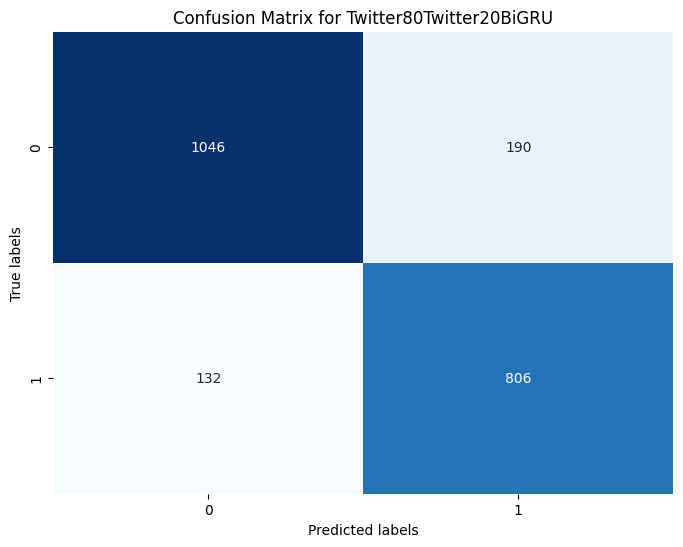

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
t80t20bigru = confusion_matrix(y_testtwitter, y_pred_binaryt80t20bigru)
plt.figure(figsize=(8, 6))
sns.heatmap(t80t20bigru, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix for Twitter80Twitter20BiGRU")
plt.show()